# 서포트 벡터 머신(Support Vector Machine)
서포트 벡터 머신(SVM: Support Vector Machine)은 분류 과제에 사용할 수 있는 강력한 머신러닝 지도학습 모델이다.

    - SVM은 분류에 사용되는 지도학습 머신러닝 모델이다.
    - SVM은 서포트 벡터(support vectors)를 사용해서 결정 경계(Decision Boundary)를 정의하고, 분류되지 않은 점을 해당 결정 경계와 비교해서 분류한다.
    - 서포트 벡터(support vectors)는 결정 경계에 가장 가까운 각 클래스의 점들이다.
    - 서포트 벡터와 결정 경계 사이의 거리를 마진(margin)이라고 한다.
    - SVM은 허용 가능한 오류 범위 내에서 가능한 최대 마진을 만들려고 한다.
    - 파라미터 C는 허용되는 오류 양을 조절한다. C 값이 클수록 오류를 덜 허용하며 이를 하드 마진(hard margin)이라 부른다. 반대로 C 값이 작을수록 오류를 더 많이 허용해서 소프트 마진(soft margin)을 만든다.
    - SVM에서는 선형으로 분리할 수 없는 점들을 분류하기 위해 커널(kernel)을 사용한다.
    - 커널(kernel)은 원래 가지고 있는 데이터를 더 높은 차원의 데이터로 변환한다. 2차원의 점으로 나타낼 수 있는 데이터를 다항식(polynomial) 커널은 3차원으로, RBF 커널은 점을 무한한 차원으로 변환한다.
    - RBF 커널에는 파라미터 감마(gamma)가 있다. 감마가 너무 크면 학습 데이터에 너무 의존해서 오버피팅이 발생할 수 있다.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('./titanic_train.csv')

X = df.drop(['Survived'], axis=1)
y = df['Survived']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1993)

In [10]:
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [11]:
# %pip install impyute
# %pip install missingno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from impyute.imputation.cs import mice
import missingno as msno

# total을 더미화
# 더미화하는 이유는 범주형 변수는 기계학습을 할 때 다룰 수 없기 때문에
dummy_X_train = pd.get_dummies(X_train, drop_first=True)
dummy_X_test = pd.get_dummies(X_test, drop_first=True)

II = IterativeImputer(verbose=False)
X_train_impute = pd.DataFrame(II.fit_transform(dummy_X_train), columns=dummy_X_train.columns)
X_test_impute = pd.DataFrame(II.transform(dummy_X_test), columns=dummy_X_train.columns)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_impute)
X_test_scaled = scaler.transform(X_test_impute)

Conf mat:  [[95 15]
 [26 43]]
accuracy:  0.770949720670391
precision:  0.7413793103448276
recall:  0.6231884057971014
f1 score:  0.6771653543307088
AUC:  0.7434123847167325


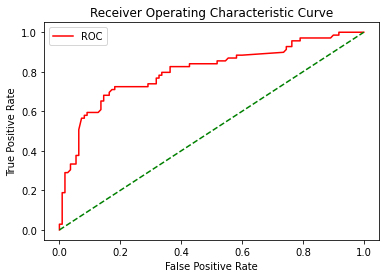

In [12]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def classifier_eval(y_test, y_pred):
    print('Conf mat: ', confusion_matrix(y_test, y_pred))
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1 score: ', f1_score(y_test, y_pred))
    print('AUC: ', roc_auc_score(y_test, y_pred))

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
classifier_eval(y_test, y_pred)
fper, tper, thresholds = roc_curve(y_test, y_prob)
plot_roc_curve(fper, tper)

Conf mat:  [[102   8]
 [ 29  40]]
accuracy:  0.7932960893854749
precision:  0.8333333333333334
recall:  0.5797101449275363
f1 score:  0.6837606837606838
AUC:  0.7534914361001317


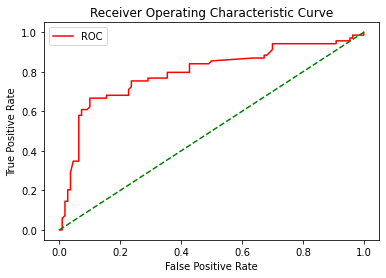

In [13]:
from sklearn.svm import SVC

model = SVC(kernel='poly', probability=True)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def classifier_eval(y_test, y_pred):
    print('Conf mat: ', confusion_matrix(y_test, y_pred))
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1 score: ', f1_score(y_test, y_pred))
    print('AUC: ', roc_auc_score(y_test, y_pred))

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
classifier_eval(y_test, y_pred)
fper, tper, thresholds = roc_curve(y_test, y_prob)
plot_roc_curve(fper, tper)

Conf mat:  [[103   7]
 [ 25  44]]
accuracy:  0.8212290502793296
precision:  0.8627450980392157
recall:  0.6376811594202898
f1 score:  0.7333333333333333
AUC:  0.787022397891963


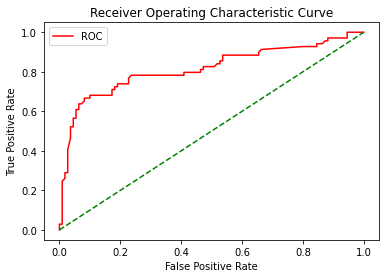

In [14]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', probability=True)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def classifier_eval(y_test, y_pred):
    print('Conf mat: ', confusion_matrix(y_test, y_pred))
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1 score: ', f1_score(y_test, y_pred))
    print('AUC: ', roc_auc_score(y_test, y_pred))

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
classifier_eval(y_test, y_pred)
fper, tper, thresholds = roc_curve(y_test, y_prob)
plot_roc_curve(fper, tper)

0.7907613513247316
{'C': 1, 'kernel': 'linear'}
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.032856      0.005939         0.001225        0.000243       1   
1       0.519948      0.252109         0.001505        0.000167     100   
2       0.059387      0.006366         0.001190        0.000052      10   
3       0.025174      0.001389         0.001158        0.000025     0.1   
4       0.033481      0.000593         0.001492        0.000058    0.01   
5       0.038098      0.000486         0.001692        0.000009   0.001   

  param_kernel                            params  split0_test_score  \
0       linear      {'C': 1, 'kernel': 'linear'}           0.776224   
1       linear    {'C': 100, 'kernel': 'linear'}           0.776224   
2       linear     {'C': 10, 'kernel': 'linear'}           0.776224   
3       linear    {'C': 0.1, 'kernel': 'linear'}           0.776224   
4       linear   {'C': 0.01, 'kernel': 'linear'}           0.776224   


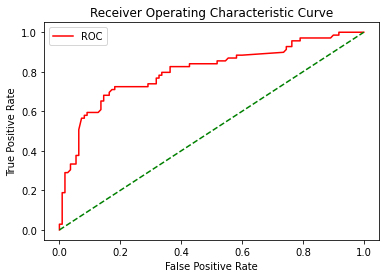

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(probability=True)

param_grid = [{'kernel':['linear'], 'C':[1,100,10,0.1,0.01,0.001]}
              #, #특정 하이퍼 파라메타 조합 피하기
              # {'kernel':['poly','rbf'], 'C':[1,100,10,0.1,0.01,0.001], 'gamma':['auto','scale',1000,100,10,1,0.1,0.01,0.001,0.0001]}
             ]

grid = GridSearchCV(model, param_grid=param_grid) 
grid.fit(X_train_scaled, y_train)

print(grid.best_score_)
print(grid.best_params_)
df = pd.DataFrame(grid.cv_results_)
print(df)

model = grid.best_estimator_

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def classifier_eval(y_test, y_pred):
    print('Conf mat: ', confusion_matrix(y_test, y_pred))
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('precision: ', precision_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, y_pred))
    print('f1 score: ', f1_score(y_test, y_pred))
    print('AUC: ', roc_auc_score(y_test, y_pred))

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
classifier_eval(y_test, y_pred)
fper, tper, thresholds = roc_curve(y_test, y_prob)
plot_roc_curve(fper, tper)